Saving housing_area_price.csv to housing_area_price.csv
Predicted price for 3300 sqr ft: 628715.7534246575
Coefficient (m): 135.78767123287673
Intercept (b): 180616.43835616432
Manual price calculation for 3300 sqr ft: 628715.7534246575
Predicted price for 5000 sqr ft: 859554.7945205481


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


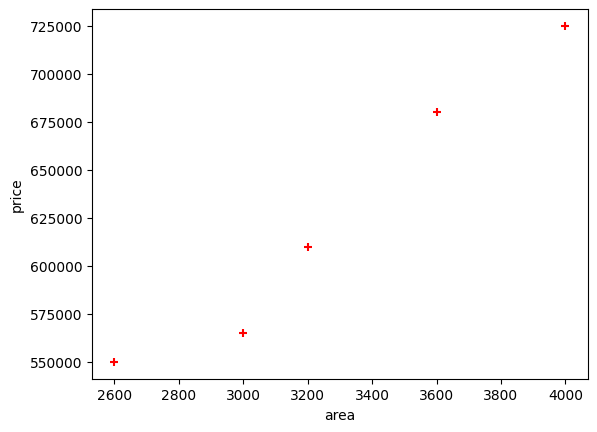

In [14]:
# -*- coding: utf-8 -*-
"""Linear-Regression-Housing_Area_Price.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1CAlZml-P6V2V1RIrodgMfF8L3Ux4V9FT
"""

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from google.colab import files

# Allow the user to upload a CSV file
uploaded = files.upload()

# Assuming the user uploads the file and it's named 'housing_area_price.csv'
filename = next(iter(uploaded))  # Get the name of the uploaded file

# Read the CSV file
df = pd.read_csv(filename)

# Display the first few rows of the dataframe
df.head()

# Scatter plot of area vs price
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'], df['price'], color='red', marker='+')

# Separate the features (area) and target (price)
X = df[['area']]
y = df['price']

# Create and train the linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict the price for an area of 3300 sqr ft
predicted_price_3300 = reg.predict([[3300]])
print(f"Predicted price for 3300 sqr ft: {predicted_price_3300[0]}")

# Get the coefficient and intercept
coef = reg.coef_[0]
intercept = reg.intercept_

print(f"Coefficient (m): {coef}")
print(f"Intercept (b): {intercept}")

# Manual calculation based on Y = m * X + b
manual_calculation = 3300 * coef + intercept
print(f"Manual price calculation for 3300 sqr ft: {manual_calculation}")

# Predict the price for an area of 5000 sqr ft
predicted_price_5000 = reg.predict([[5000]])
print(f"Predicted price for 5000 sqr ft: {predicted_price_5000[0]}")


In [15]:
# -*- coding: utf-8 -*-
"""Multiple_LR_HomePrice.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1fK78C8TPV44HdvT6lsMhaau2wMtKXquQ
"""

import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import files

# Allow the user to upload a CSV file
uploaded = files.upload()

# Get the uploaded file name
filename = next(iter(uploaded))  # Get the name of the uploaded file

# Read the CSV file into a DataFrame
df = pd.read_csv(filename)

# Display the first few rows of the dataframe
df.head()

# Data Preprocessing: Fill NA values with the median value of a column
df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df.head()

# Create and train the multiple linear regression model
reg = linear_model.LinearRegression()
reg.fit(df.drop('price', axis='columns'), df.price)

# Display the coefficients and the intercept
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

# Prepare the prediction input as a DataFrame to avoid warning
input_data = pd.DataFrame([[3000, 3, 40]], columns=['area', 'bedrooms', 'age'])

# Predict the price of a home with 3000 sqr ft area, 3 bedrooms, 40 years old
predicted_price = reg.predict(input_data)
print(f"Predicted price for a home with 3000 sqr ft, 3 bedrooms, 40 years old: {predicted_price[0]}")

# Manual calculation based on the coefficients and intercept
manual_calculation = (112.06244194 * 3000) + (23388.88007794 * 3) + (-3231.71790863 * 40) + 221323.00186540396
print(f"Manual price calculation: {manual_calculation}")


Saving homeprices_Multiple_LR.csv to homeprices_Multiple_LR.csv
Coefficients:  [  112.06244194 23388.88007794 -3231.71790863]
Intercept:  221323.00186540396
Predicted price for a home with 3000 sqr ft, 3 bedrooms, 40 years old: 498408.2515803067
Manual price calculation: 498408.251574024


Column Names: Index(['year', 'per capita income (US$)'], dtype='object')
Year=2020, Predicted Income=$41,288.69
Year=2027, Predicted Income=$47,087.95
-------------------------------------------------------------------------------------------
Coefficient (m): 828.47
-------------------------------------------------------------------------------------------
Intercept (b): -1,632,210.76
-------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


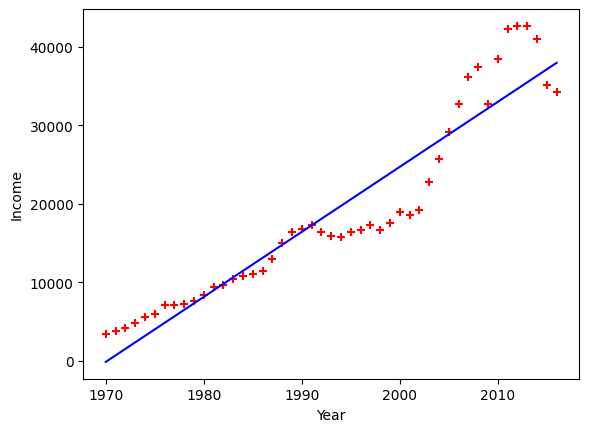

In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('canada_per_capita_income.csv')

# Check column names
print("Column Names:", df.columns)

# Rename columns if needed
df.rename(columns={'per capita income (US$)': 'Income'}, inplace=True)

# Remove any NaN values
df.dropna(inplace=True)

plt.xlabel('Year')
plt.ylabel('Income')

# Use correct column names
plt.scatter(df['year'], df['Income'], color='red', marker='+')

# Prepare input feature
X = df[['year']]  # Independent variable
y = df['Income']  # Dependent variable

# Train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict future incomes
year_2020 = reg.predict([[2020]])[0]
year_2027 = reg.predict([[2027]])[0]

print(f'Year=2020, Predicted Income=${year_2020:,.2f}')
print(f'Year=2027, Predicted Income=${year_2027:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Coefficient (m): {reg.coef_[0]:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Intercept (b): {reg.intercept_:,.2f}')
print("-------------------------------------------------------------------------------------------")

# Plot regression line
plt.plot(df['year'], reg.predict(X), color='blue')
plt.show()


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
YearsExperience    2
Salary             0
dtype: int64
YearsExperience    0
Salary             0
dtype: int64
---------------------------------
YearsExperience=12, Predicted Income=$139,980.89
-------------------------------------------------------------------------------------------
Coefficient (m): 9,398.64
-------------------------------------------------------------------------------------------
Intercept (b): 27,197.20
-------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


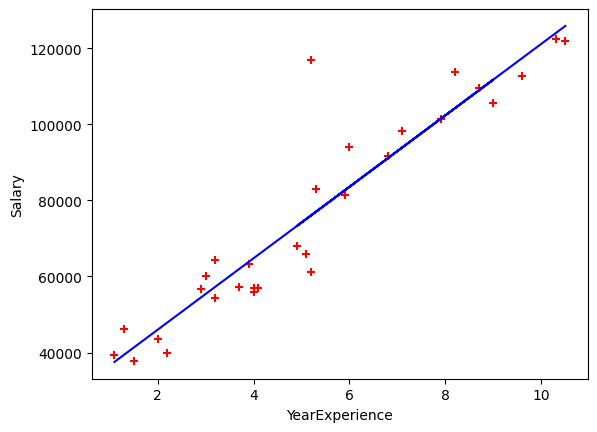

In [18]:
#salary.csv
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('salary.csv')
print(df.head())

print(df.isnull().sum())
df.fillna(df['YearsExperience'].mean(),inplace=True)
print(df.isnull().sum())
print("---------------------------------")

plt.xlabel('YearExperience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience, df.Salary, color='red', marker='+')

# Prepare input feature
X = df[['YearsExperience']]  # Independent variable
y = df['Salary']  # Dependent variable

# Train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict future incomes
year12= reg.predict([[12]])[0]
# year_2027 = reg.predict([[2027]])[0]

print(f'YearsExperience=12, Predicted Income=${year12:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Coefficient (m): {reg.coef_[0]:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Intercept (b): {reg.intercept_:,.2f}')
print("-------------------------------------------------------------------------------------------")

# Plot regression line
plt.plot(df.YearsExperience, reg.predict(X), color='blue')

In [19]:
#Hiring
import pandas as pd
import numpy as np
from sklearn import linear_model

# Load dataset
df = pd.read_csv('hiring.csv')
print(df.isnull().sum())
# Fill missing values
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)

# Convert experience to string (for one-hot encoding)
df['experience'] = df['experience'].astype(str)

# Apply one-hot encoding to 'experience'
df_encoded = pd.get_dummies(df, columns=['experience'], drop_first=True)

# Separate features and target variable
X = df_encoded.drop('salary($)', axis='columns')
y = df_encoded['salary($)']

# Train the regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Function to predict salary
def predict_salary(exp, test_score, interview_score):
    # Convert experience to one-hot encoding
    exp_col = f'experience_{exp}'
    input_data = {col: 0 for col in X.columns}  # Initialize all columns to 0
    if exp_col in input_data:
        input_data[exp_col] = 1  # Set the correct experience column
    input_data['test_score(out of 10)'] = test_score
    input_data['interview_score(out of 10)'] = interview_score

    # Convert to DataFrame and predict
    input_df = pd.DataFrame([input_data])
    predicted_salary = reg.predict(input_df)[0]

    return f'Predicted Salary: ${predicted_salary:,.2f}'

# Example Prediction
print(predict_salary('twelve', 10, 10))
print(predict_salary('two', 9, 6))

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64
Predicted Salary: $67,803.92
Predicted Salary: $63,509.80


<ipython-input-19-fa275a331ac4>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)


In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('/content/1000_Companies.csv')

# One-hot encode the 'State' column
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

# Separate features and target variable
X = df_encoded.drop('Profit', axis='columns')  # Features: R&D Spend, Administration, Marketing Spend, State
y = df_encoded['Profit']  # Target: Profit

# Train linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Function to predict profit
def predict_profit(rnd_spend, admin_spend, marketing_spend, state):
    # Initialize input data dictionary with all zeros
    input_data = {col: 0 for col in X.columns}

    # Assign provided values
    input_data['R&D Spend'] = rnd_spend
    input_data['Administration'] = admin_spend
    input_data['Marketing Spend'] = marketing_spend

    # One-hot encode 'State'
    state_col = f'State_{state}'
    if state_col in input_data:
        input_data[state_col] = 1

    # Convert to DataFrame and predict
    input_df = pd.DataFrame([input_data])
    predicted_profit = reg.predict(input_df)[0]

    return f'Predicted Profit: ${predicted_profit:,.2f}'

# Example Prediction
print(predict_profit(91694.48, 515841.3, 11931.24, 'Florida'))


Predicted Profit: $510,570.99
